<a href="https://colab.research.google.com/github/PremGorecki/DataScience/blob/main/07_uczenie_glebokie/01_pierwsza_siec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Istnieje tylko w Google Colab, wersja szybsza ;)
%tensorflow_version 2.x  

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

import tensorflow as tf
from tensorflow.keras.datasets.mnist import load_data  #nasze dane
from tensorflow.keras.models import Sequential  # model sekwnecyjne można budować wartstwa po warstwie
from tensorflow.keras.layers import Flatten  # klasa flatten pozwoli nam wypłaszczyć nasze dane ...
# jak było 8 x 8 to musieliśmy zrobić 64 teraz to ta warstwa to zrobi
from tensorflow.keras.layers import Dense   # warstwa gęsto połączona
from tensorflow.keras.layers import Dropout # warstwa która pozwoli nam kontrolować uczenie...
# porzucamy pewne neurony w warstwie ukrytej aby nie przeuczyć sieci

np.set_printoptions(precision=12, suppress=True, linewidth=120) # opcje do printowania
print(tf.__version__)

2.8.2


Załadowanie i przygotowanie danych

In [5]:
(X_train, y_train), (X_test, y_test) = load_data() # zwróci od razu dane train i test

print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

11501568/11490434 [==============================] - 0s 0us/step
X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


In [6]:
# Jak wygląda jedna próbka
rint(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   

In [7]:
# rozmiar naszych danych
print(f'X_train[0] shape: {X_train[0].shape}')

X_train[0] shape: (28, 28)


In [8]:
# Dane muszą być wystandaryzowane
X_train = X_train / 255.
X_test = X_test / 255.

Eksploracja danych

(-0.5, 27.5, 27.5, -0.5)

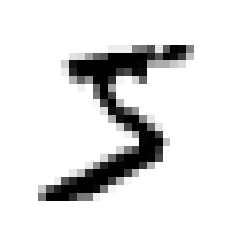

In [9]:
# przykładowy obraz
plt.imshow(X_train[0], cmap='gray_r')
plt.axis('off')

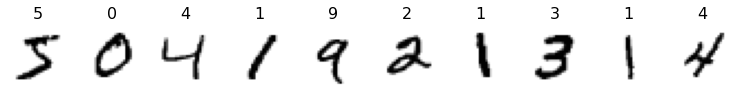

In [12]:
# Teraz kilka zdjęć
plt.figure(figsize=(13, 13))
for i in range(1, 11):
    plt.subplot(1, 10, i)
    plt.axis('off')
    plt.imshow(X_train[i-1], cmap='gray_r')
    plt.title(y_train[i-1], color='black', fontsize=16)
plt.show()

Budowa sieci neuronowej

In [13]:
model = Sequential()  # tworzy sieć i dodajemy warstwy
model.add(Flatten(input_shape=(28, 28))) # warsta 1 która wypłaszczy dane
model.add(Dense(units=128, activation='relu')) # warstaw gęsto połączona 128 neuronów ukrytych...
# funkcja aktywacji relu - jedna z popularniejszych funkcji - zeruje wartości ujemne, dodatnie bez zmian
model.add(Dropout(0.2)) # 20% neuronów zostanie porzuconych w tej wartstwie 
model.add(Dense(units=10, activation='softmax')) # warstawa wynikowa 10 neuronów
# funkcja aktywacji softmax która zwróci nam pradwopodbieństwo poszczególnej klasy

model.compile(optimizer='adam', # poczytać w keras
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary() # pokazuje nam ile w każdej wartswie mamy wag do przetrenowania

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


Trenowanie modelu

In [15]:
# trenujemy teraz 
history = model.fit(X_train, y_train, epochs=15)

Epoch 1/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0652 - accuracy: 0.9797
Epoch 2/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0586 - accuracy: 0.9811
Epoch 3/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0541 - accuracy: 0.9823
Epoch 4/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0465 - accuracy: 0.9845
Epoch 5/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0450 - accuracy: 0.9850
Epoch 6/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0401 - accuracy: 0.9868
Epoch 7/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0379 - accuracy: 0.9871
Epoch 8/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0353 - accuracy: 0.9879
Epoch 9/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0340 - accuracy: 0.9890
Epoch 10/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.031

Ocena modelu

In [16]:
# na danych testowych
model.evaluate(X_test, y_test, verbose=2)

313/313 - 1s - loss: 0.0848 - accuracy: 0.9797 - 524ms/epoch - 2ms/step


[0.0847608894109726, 0.9797000288963318]

In [17]:
# tworzymy wykres jak wyglądał strata i dokładność przy trenowaniu
metrics = pd.DataFrame(history.history)
metrics

,loss,accuracy
0,0.065199,0.979650
1,0.058642,0.981083
2,0.054136,0.982300
3,0.046526,0.984550
4,0.044981,0.984967
5,0.040091,0.986750
6,0.037924,0.987067
7,0.035308,0.987917
8,0.033954,0.988967
9,0.031550,0.989633


In [18]:
fig = make_subplots(rows=2, cols=1)
fig.add_trace(go.Scatter(y=metrics['loss'], name='loss'), row=1, col=1)
fig.add_trace(go.Scatter(y=metrics['accuracy'], name='accuracy'), row=2, col=1)
fig.update_layout(width=800, height=400)

Predykcja na podstawie modelu

In [27]:
# zwraca wartość pradwopodobieństwa dla każdej klasy
# jedneym wierusz u nas jest 10 wartości bo jest 10 klas
# w środku są trzy kropki ale to ok
predict_x=model.predict(X_test)

In [28]:
# możemy też zwrócić sobie klasy zamiast prawdwopdobieństwa
classes_x = np.argmax(predict_x,axis=1)

y_pred = classes_x

y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [29]:
# wartości rzeczywiste i przewidziane
red = pd.concat([pd.DataFrame(y_test, columns=['y_test']), pd.DataFrame(y_pred, columns=['y_pred'])], axis=1)
pred.head(10)

,y_test,y_pred
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
5,1,1
6,4,4
7,9,9
8,5,5
9,9,9


In [30]:
# 10 pierwszych które się nie zgadzają
misclassified = pred[pred['y_test'] != pred['y_pred']]
misclassified.index[:10]

Int64Index([115, 247, 321, 340, 381, 445, 495, 610, 659, 684], dtype='int64')

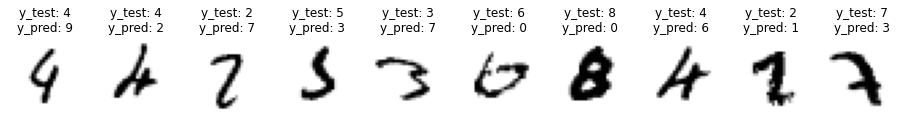

In [32]:
# i wyświetlamy te które się nie zgadzają
plt.figure(figsize=(16, 16))
for i, j in zip(range(1, 11), misclassified.index[:10]):
    plt.subplot(1, 10, i)
    plt.axis('off')
    plt.imshow(X_test[j], cmap='gray_r')
    plt.title(f'y_test: {y_test[j]}\ny_pred: {y_pred[j]}', color='black', fontsize=12)
plt.show()